In [14]:
! git clone https://bitbucket.org/jadslim/german-traffic-signs 

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [15]:
! ls german-traffic-signs #p ext is for pickled file

signnames.csv  test.p  train.p	valid.p


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten #dropout sets to 0
from keras.layers.convolutional import Conv2D, MaxPooling2D #CNN
import pickle
import random
import cv2

In [17]:
%matplotlib inline
np.random.seed(0)

In [18]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f) #dictionary data

with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f) #dictionary data

with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f) #dictionary data

print(type(train_data))

x_train, y_train = train_data['features'] , train_data['labels']
x_val, y_val = val_data['features'] , val_data['labels']
x_test, y_test = test_data['features'] , test_data['labels']

<class 'dict'>


In [19]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [20]:
assert(x_train.shape[0] == y_train.shape[0], 'No of img not equal to no of labels')
assert(x_test.shape[0] == y_test.shape[0], 'No of img not equal to no of labels')
assert(x_val.shape[0] == y_val.shape[0], 'No of img not equal to no of labels')
assert(x_train.shape[1:] ==(32, 32, 3), 'improper dimensions')
assert(x_val.shape[1:] ==(32, 32, 3), 'improper dimensions')
assert(x_test.shape[1:] ==(32, 32, 3), 'improper dimensions')

<ipython-input-20-0af3af7bf0ae>:1: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x_train.shape[0] == y_train.shape[0], 'No of img not equal to no of labels')
<ipython-input-20-0af3af7bf0ae>:2: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x_test.shape[0] == y_test.shape[0], 'No of img not equal to no of labels')
<ipython-input-20-0af3af7bf0ae>:3: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x_val.shape[0] == y_val.shape[0], 'No of img not equal to no of labels')
<ipython-input-20-0af3af7bf0ae>:4: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x_train.shape[1:] ==(32, 32, 3), 'improper dimensions')
<ipython-input-20-0af3af7bf0ae>:5: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x_val.shape[1:] ==(32, 32, 3), 'improper dimensions')
<ipython-input-20-0af3af7bf0ae>:6: SyntaxWarning: assertion is always true, perhaps remove parenthes

In [21]:
data = pd.read_csv('german-traffic-signs/signnames.csv') 
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

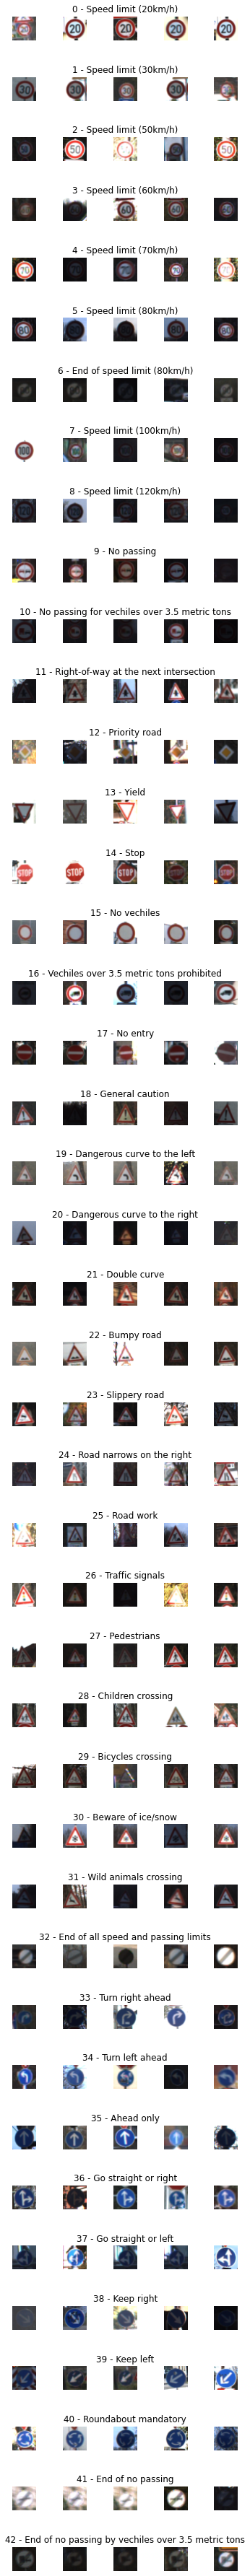

In [22]:
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
  for j, row in data.iterrows():
    x_selected = x_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + " - " + row["SignName"])
      num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

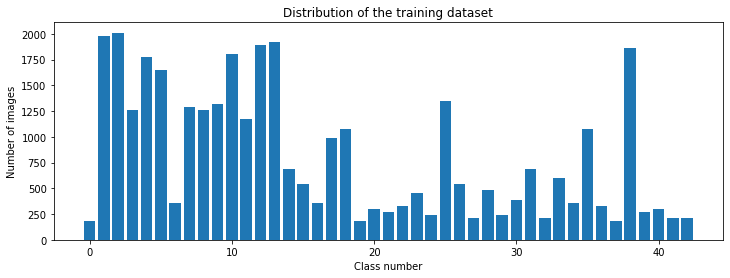

In [23]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


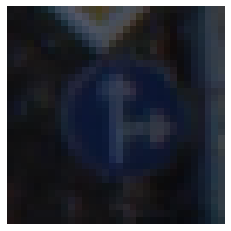

In [24]:
#CV2
plt.imshow(x_train[1000])
plt.axis('off')
print(x_train[1000].shape)
print(y_train[1000])

(32, 32)


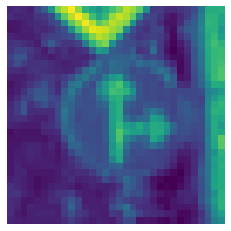

In [25]:
#1. grayscaling
def grayscale(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

img = grayscale(x_train[1000])
plt.imshow(img)
plt.axis('off')
print(img.shape)

(32, 32)


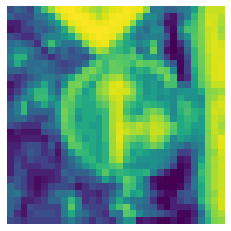

In [26]:
#2. Histogram equalization
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [27]:
#entire dataset
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

x_train = np.array(list(map(preprocessing, x_train)))
x_val = np.array(list(map(preprocessing, x_val)))
x_test = np.array(list(map(preprocessing, x_test)))

(34799, 32, 32)


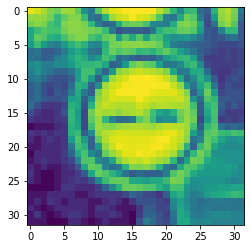

In [28]:
plt.imshow(x_train[random.randint(0, len(x_train)-1)])
print(x_train.shape)


In [29]:
x_train = x_train.reshape(34799, 32, 32, 1)
x_test = x_test.reshape(12630, 32, 32, 1)
x_val = x_val.reshape(4410, 32, 32, 1)

In [30]:
#creating augmented images
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
 
datagen.fit(x_train)


(15, 32, 32, 1)


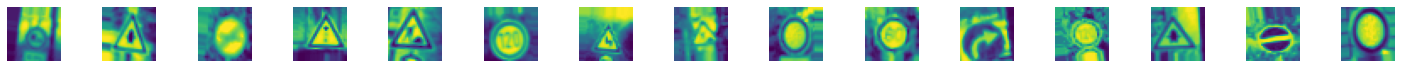

In [31]:
#converting some images into augumented images

batches = datagen.flow(x_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)

In [32]:
#One hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [33]:
def modified_model():
  model = Sequential()

  # model.add(Conv2D(30, (5,5), input_shape = (32, 32, 1), activation = 'relu'))
  #finetuning increasing the number of feature increases the accuracy
  model.add(Conv2D(60, (5,5), input_shape = (32, 32, 1), activation = 'relu'))
  model.add(Conv2D(60, (5,5), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  # model.add(Conv2D(15, (3,3), activation='relu'))
  #finetuning increasing the number of feature increases the accuracy
  model.add(Conv2D(30, (3,3), activation='relu'))
  model.add(Conv2D(30, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  # model.compile(Adam(lr = 0.01), loss = "categorical_crossentropy", metrics = ['accuracy'])
  #finetuning reduce learning rate by 10% for complex dataset
  model.compile(Adam(lr = 0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])
  
  
  return model

In [34]:
model = modified_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 30)          0

In [35]:
#history = model.fit(x_train, y_train,epochs=10, validation_data=(x_val, y_val), batch_size=400, verbose=1, shuffle=1)
#augmented img
#history = model.fit(datagen.flow(x_train, y_train, batch_size=50), steps_per_epoch=2000, epochs=10, validation_data=(x_val, y_val), shuffle=1)

history = model.fit(datagen.flow(x_train, y_train, batch_size=50),  epochs=10, validation_data=(x_val, y_val), shuffle = 1)


Epoch 1/10
696/696 [==============================] - 397s 569ms/step - loss: 2.8241 - accuracy: 0.2288 - val_loss: 0.5732 - val_accuracy: 0.8302
Epoch 2/10
696/696 [==============================] - 395s 567ms/step - loss: 1.0522 - accuracy: 0.6681 - val_loss: 0.2481 - val_accuracy: 0.9252
Epoch 3/10
696/696 [==============================] - 400s 574ms/step - loss: 0.6410 - accuracy: 0.7980 - val_loss: 0.1760 - val_accuracy: 0.9388
Epoch 4/10
696/696 [==============================] - 398s 571ms/step - loss: 0.4728 - accuracy: 0.8521 - val_loss: 0.0862 - val_accuracy: 0.9789
Epoch 5/10
696/696 [==============================] - 396s 569ms/step - loss: 0.3969 - accuracy: 0.8747 - val_loss: 0.0763 - val_accuracy: 0.9755
Epoch 6/10
696/696 [==============================] - 400s 575ms/step - loss: 0.3313 - accuracy: 0.8963 - val_loss: 0.0485 - val_accuracy: 0.9875
Epoch 7/10
696/696 [==============================] - 406s 584ms/step - loss: 0.3070 - accuracy: 0.9029 - val_loss: 0.0590 -